<a href="https://colab.research.google.com/github/Leonardo-Romero/curso_computacion_cuantica/blob/patch-3/Proyecto_final/JAIME_LEONARDO_ROMERO_ROBAYO/JAIME_LEONARDO_ROMERO_ROBAYO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Proyecto Final - Computación Cuántica**

# **Investigación**

## **¿Qué?**

***Simon's Algorithm***



---


El algoritmo de Simon, presentado por primera vez 
en la Referencia [1], fue el primer algoritmo cuántico en mostrar una aceleración exponencial en comparación con el mejor algoritmo clásico para resolver un problema específico.

---





---


El planteamiento de el algoritmo de Simon es este:

Se nos da una funcion **F** que puede ser de dos tipos:

*   1 a 1: para cada output (out), existe un único input (inp) tal que F(inp) = out
*   2 a 1:  para cada output (out), existen únicamente dos input (inp1, inp2) tales que F(inp1) = F(inp2) = out

Además se cumple que si F(inp1) = f(inp2), entonces inp1 ⊕ inp2 = b, para cierto b oculto.



---




Supongamos un ejemplo donde se trabaja con 3 qubits. (8 posibles valores a introducir en la función).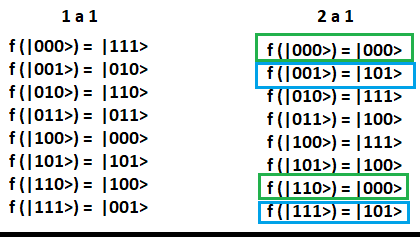



---


Entonces desde un punto de vista clásico si no se tiene mas información de esta función lo que queda es seguir enviando preguntas para ver si dos inputs distintos nos han dado un mismo output y por tanto descartar el 1 a 1. Pero en el peor de los casos el número de preguntas que tendriamos que hacer es de (n/2+1), por que puede ser que justo las (n/2) primeras preguntas hayan sido a elementos con outputs distintos y es este el ultimo termino el que va a determinar en cual de las dos funciones nos encontramos. Pues el algoritmo de Simon lo que consigue es diferenciar este tipo de funciones reduciendo exponencialmente el número de preguntas que debemos hacer. En pocas palabras el enunciado original lo que dice es que este algoritmo es capaz de diferenciar funciones 1 a 1 de funciones 2 a 1 que cumplen un requisito en particular. 


---



**La idea principal es hacer uso de b, cómo nuestra cadena secreta esto con el fin de hacer una similitud de cómo son los calculos si se utilizara para encontrar el cálculo de módulos o los ataques por fuerza bruta para encontrar la llave de un texto cifrado. Además no menos importante el poder aplicar y demostrar mas secuencial el proceso de discrimincación del tipo de funciones que hace el algoritmo de Simon**

## **¿Cómo?**



---


El algoritmo de Simon define que:

*   Existe un **b** tal que para todo x, y que cumple f(x) = f(y) se tiene que x ⊕ y = b.

Es decir:

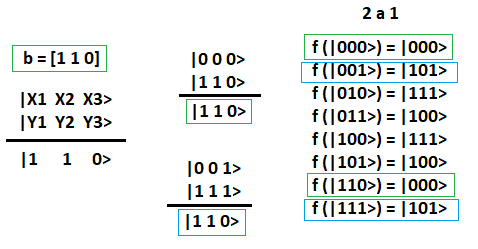

Por tanto el algoritmo de Simon es capaz de distinguir funciones 1 a 1 de funciones 2 a 1 que cumplen esta propiedad. Entonces teniendo esto en mente solo hay que darse cuenta de un pequeño detalle y es que si b = |000> justo vamos a tener una función 1 a 1 ya que si tenemos un input |X1X2X3> y la suma binaria tiene que dar |000> el unico valor posible es precisamente tambien |X1X2X3> por lo tanto es el mismo el unico valor que va a tener ese output, por tanto el algoritmo de Simon no es otra cosa que una subrutina capaz de obtener el valor de **b**. Por ello si **b** final nos da el valor 0 es una función 1 a 1, pero si nos da un valor diferente es una función 2 a 1. 


---




El circuito asociado al algoritmo de Simon: b
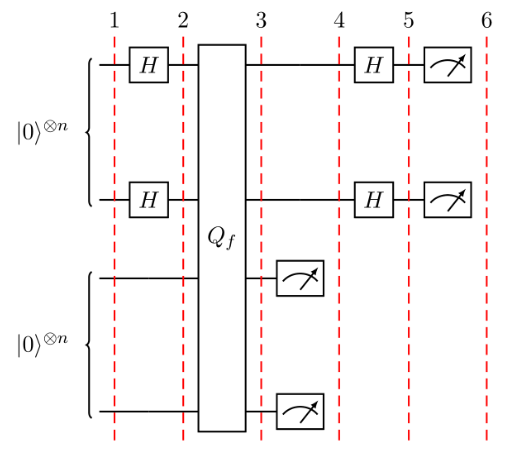


Donde la función de consulta, Qf actúa sobre dos registros cuánticos

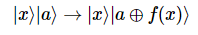

En el caso específico de que el segundo registro esté en el estado |0⟩=|00…0⟩ se tiene:

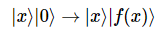

El algoritmo implica entonces que: 


1.   Dos input n-qubit se inicialicen al estado cero

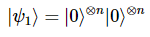

2.   Aplicar Hadamard al primer registro

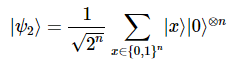

3.  Aplicar la función Qf

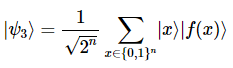

4.  Mide el segundo registro. Se observará un cierto valor de f(x). Debido al planteamiento del problema, el valor observado f(x) podría corresponder a dos posibles entradas: X y Y = x ⊕ b. Por lo tanto el primer registro se convierte en:

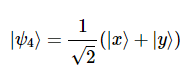

   donde omitimos el segundo registro ya que se ha medido.

5.  Aplicar Hadamard al primer registro

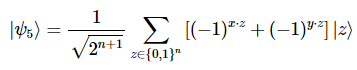

6.  Medir el primer registro dará una salida solo si:

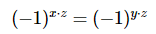

lo que significa:

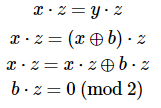

Se medirá un string z, cuyo producto interior con b = 0 . Así, repitiendo el algoritmo ≈ n veces, podremos obtener n valores diferentes de z y se puede escribir el siguiente sistema de ecuaciones:

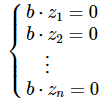


A partir de la cual se puede determinar b.


---




**Haciendo uso de el algoritmo general de Simon realizando pruebas de cadenas secretas (b) de 3 qubits, por otro lado se hará la implmentación de cómo se hace el cálculo para la discriminación de si una función es (1 a 1) o (2 a 1) para poder notar cómo el encontrar estas cadenas secretas se necesitan exponencialmente menos pasos que si se hace de una manera clasica**

## **¿Cuando?**



---


En 1993 Dan Simon demostraba la ventaja que tendría un computador cuántico frente a uno tradicional al comparar el modelo de probabilidad clásica con el modelo cuántico que finalmente fue propuesto en 1994. Sus ideas sirvieron como base para el desarrollo de algunos algoritmos deauténtico interés práctico, como el de Shor. También en 1993, Charles Benett descubre el tele-transporte cuántico, que abre una nueva vía de investigación hacia
el desarrollo de comunicaciones cuánticas. 


---



## **¿Dondé?**



---

Se realizarán principalmente pruebas en ambientes simulados como Google Collaboratory para luego realizar una implementación real en herramientas como IBM quantum

---






# **Implementación**

## **Librerías e importaciones**

In [1]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install pennylane-sf --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-kxmqcvqr
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-kxmqcvqr
     |████████████████████████████████| 1.6 MB 4.3 MB/s 
     |████████████████████████████████| 4.8 MB 48.7 MB/s 
     |████████████████████████████████| 12.8 MB 58.0 MB/s 
     |████████████████████████████████| 240 kB 65.1 MB/s 
     |████████████████████████████████| 106 kB 65.8 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 37.5 MB 442 kB/s 
     |████████████████████████████████| 929 kB 41.3 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 4.0 MB 51.4 MB/s 
     |████████████████████████████████| 1.9 MB 75.8 MB/s 

In [2]:
# importando Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# importando basic plot herramientas
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

#Implementación en desipositivo real
from qiskit import IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
import pennylane as qml

## **Funcionamniento secuencial de discriminación de formula (Tipo 1 a 1) ó (Tipo 2 a 1) - Implementación. (Importante demostración)**

In [3]:
class Uf(qml.operation.Operation):

    num_wires = 6

    def compute_decomposition(self, wires):
      qml.CNOT(wires = [wires[0], wires[3]])
      qml.CNOT(wires = [wires[1], wires[5]])
      qml.CNOT(wires = [wires[2], wires[5]])

#------------------ caso de 1 a 1 -----------------------

#      qml.CNOT(wires = [wires[0], wires[3]])
#      qml.CNOT(wires = [wires[1], wires[4]])
#      qml.CNOT(wires = [wires[2], wires[5]])

#------------------ caso de 2 a 1 -----------------------

#      qml.CNOT(wires = [wires[0], wires[3]])
#      qml.CNOT(wires = [wires[1], wires[5]])
#      qml.CNOT(wires = [wires[2], wires[5]])

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


(<Figure size 360x504 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f5a744e94c0>)

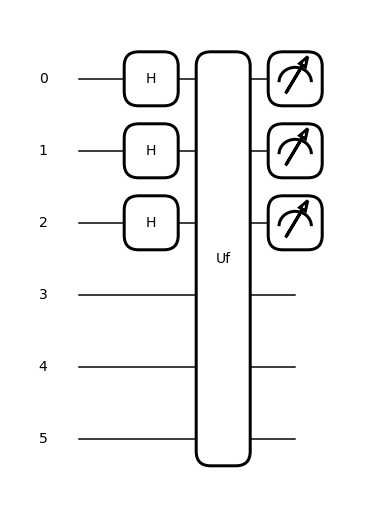

In [4]:
dev = qml.device("default.qubit", wires = 6, shots = 1)

@qml.qnode(dev)
def circuit():

  for i in range(3):
    qml.Hadamard(wires = i)

  Uf(wires = range(6))

  return qml.sample(wires = range(3))

qml.draw_mpl(circuit)()

In [5]:
zs = []
z = circuit().tolist()

while len(zs) != 3:
  if z != [0,0,0] and not z in zs:
    zs.append(z)
  z = circuit().tolist()

zs

[[0, 0, 1], [1, 0, 0], [1, 1, 1]]

In [6]:
for z in zs:
  print(f"b0 x {z[0]} + b1 x {z[1]} + b2 x {z[2]} = 0")

b0 x 0 + b1 x 0 + b2 x 1 = 0
b0 x 1 + b1 x 0 + b2 x 0 = 0
b0 x 1 + b1 x 1 + b2 x 1 = 0


In [7]:
@qml.qnode(dev)
def circuit(x):

  qml.BasisEmbedding(x, wires = range(3))

  Uf(wires = range(6))

  return qml.sample(wires = range(3, 6))

for x in range(8):
  print(circuit(x))

#caso 1 a 1 si no se repiten
#caso 2 a 1 si se repiten

[0 0 0]
[0 0 1]
[0 0 1]
[0 0 0]
[1 0 0]
[1 0 1]
[1 0 1]
[1 0 0]


## **Simulador local**

**Supongamos que tengo un mensaje y un texto cifrado el cual cuenta con una llave para encriptar, dicha llave sera nuestro (b) secreto de tal manera que debo encontrarla, entonces suponiendo un ataque por fuerza bruta para encontrar esta llave se hará con el algoritmo de Simon haciendo uso de 3 qubits.**

In [8]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

simon_circuit.h(range(n))    
    
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

simon_circuit.barrier()

simon_circuit.h(range(n))

simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

<ipython-input-8-907357f83677>:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(b)


┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
     ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

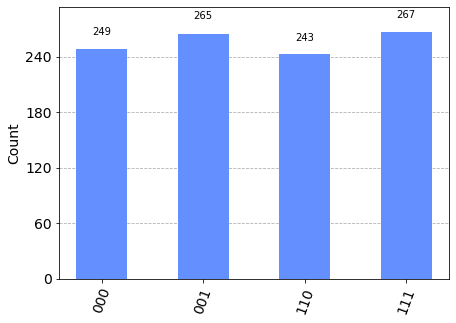

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.001 = 0 (mod 2)
110.111 = 0 (mod 2)
110.000 = 0 (mod 2)
110.110 = 0 (mod 2)


## **Prueba en un dispositivo real**

**En este caso supongamos la misma situación anteriror pero esta vez se hará  con 2 qubits.**

In [11]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

simon_circuit_2.h(range(n))

simon_circuit_2 += simon_oracle(b)

simon_circuit_2.h(range(n))

simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw()

<ipython-input-11-c849be1095a2>:7: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit_2 += simon_oracle(b)


┌───┐                         ┌───┐┌─┐
q_0: ┤ H ├──■─────────■─────────■──┤ H ├┤M├
     ├───┤  │         │  ┌───┐  │  └┬─┬┘└╥┘
q_1: ┤ H ├──┼────■────┼──┤ H ├──┼───┤M├──╫─
     └───┘┌─┴─┐  │  ┌─┴─┐└───┘  │   └╥┘  ║ 
q_2: ─────┤ X ├──┼──┤ X ├───────┼────╫───╫─
          └───┘┌─┴─┐└───┘     ┌─┴─┐  ║   ║ 
q_3: ──────────┤ X ├──────────┤ X ├──╫───╫─
               └───┘          └───┘  ║   ║ 
c: 2/════════════════════════════════╩═══╩═
                                     1   0

In [12]:
IBMQ.enable_account('dcdf59abd367be0d8ad17736ec9d80c5519fc8afc184a12a9c9017537d5d2b1fee82d017ebebe2fe4b86f2b05fa4a8b03e01f18e2da230cd012ee55bea07d603')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n*2 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
qobj = assemble(transpiled_simon_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

least busy backend:  ibmq_belem


<ipython-input-13-0fb81e1c34dd>:10: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


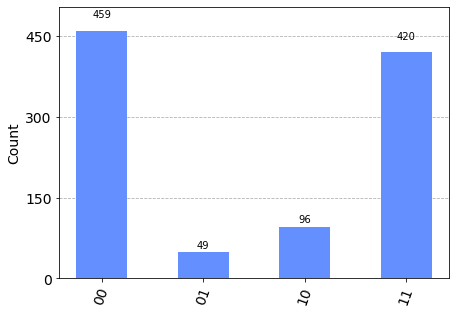

In [14]:
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [15]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
11.00 = 0 (mod 2) (44.8%)
11.01 = 1 (mod 2) (4.8%)
11.10 = 1 (mod 2) (9.4%)
11.11 = 0 (mod 2) (41.0%)


# **Referencias**


---


[1] Daniel R. Simon (1997) "Sobre el poder de la computación cuántica" SIAM Journal on Computing, 26(5), 1474–1483, doi:10.1137/S0097539796298637

[2] Guangya Cai y Daowen Qiu. Separación óptima en complejidades de consultas exactas para el problema de Simon. Revista de Ciencias de la Computación y Sistemas 97: 83-93, 2018, https://doi.org/10.1016/j.jcss.2018.05.001

[3] https://qiskit.org/textbook/ch-algorithms/simon.html
